# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [31]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i > 0):
        set_count += 1
        record_count = 1
    
    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | seven pagodas
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | iqaluit
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | hithadhoo
Processing Record 8 of Set 1 | vilyuchinsk
Processing Record 9 of Set 1 | le port
Processing Record 10 of Set 1 | xinpu
Processing Record 11 of Set 1 | yaren
Processing Record 12 of Set 1 | tual
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | port hueneme
Processing Record 16 of Set 1 | remire-montjoly
Processing Record 17 of Set 1 | kapa'a
Processing Record 18 of Set 1 | boi
Processing Record 19 of Set 1 | loxstedt
Processing Record 20 of Set 1 | neftekumsk
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | tura
Processing Record 23 of Set 1 | k

In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,seven pagodas,12.6264,80.1722,25.56,77,34,3.66,IN,1729895690
1,jamestown,42.0970,-79.2353,12.80,66,75,2.57,US,1729895691
2,college,64.8569,-147.8028,-4.75,80,20,0.45,US,1729895692
3,hawaiian paradise park,19.5933,-154.9731,24.94,98,100,1.54,US,1729895693
4,iqaluit,63.7506,-68.5145,-1.15,80,75,4.63,CA,1729895694


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [36]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,seven pagodas,12.6264,80.1722,25.56,77,34,3.66,IN,1729895690
1,jamestown,42.0970,-79.2353,12.80,66,75,2.57,US,1729895691
2,college,64.8569,-147.8028,-4.75,80,20,0.45,US,1729895692
3,hawaiian paradise park,19.5933,-154.9731,24.94,98,100,1.54,US,1729895693
4,iqaluit,63.7506,-68.5145,-1.15,80,75,4.63,CA,1729895694


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

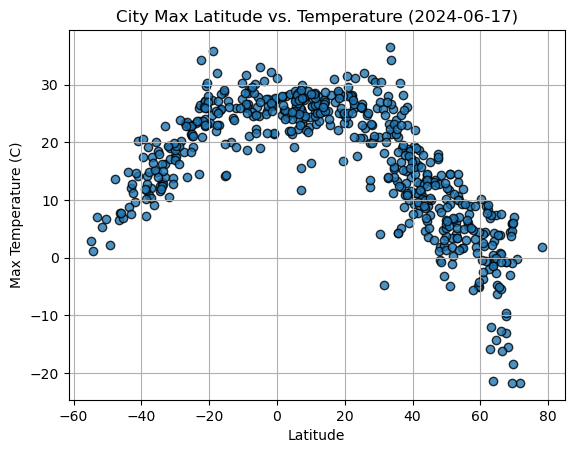

In [37]:
# Build scatter plot for Latitude vs. Max Temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

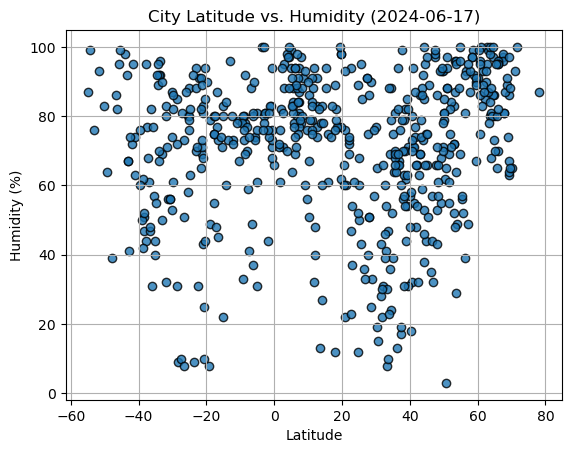

In [38]:
# Build scatter plot for Latitude vs. Humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()



#### Latitude Vs. Cloudiness

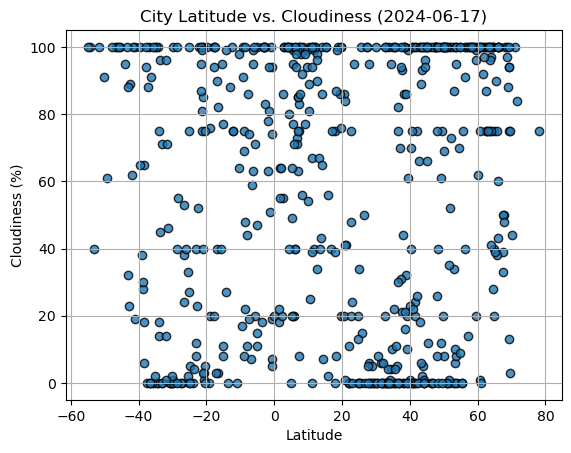

In [39]:
# Build scatter plot for Latitude vs. Cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

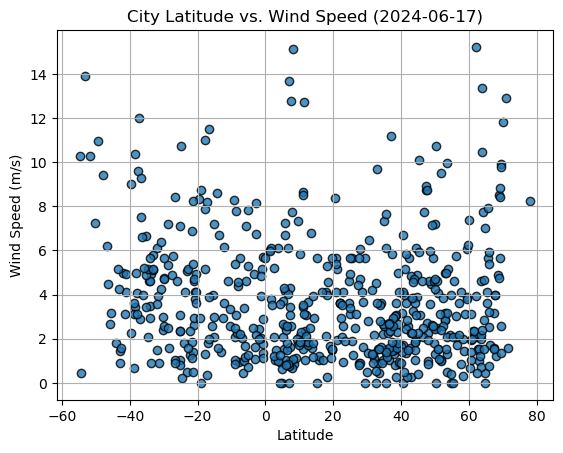

In [40]:
# Build scatter plot for Latitude vs. Wind Speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2024-06-17)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, hemisphere, variable, text_coordinates):
    """
    Creates a scatter plot with a linear regression model.

    Parameters:
    - x_values: The independent variable (Latitude)
    - y_values: The dependent variable (e.g., Temperature, Humidity)
    - hemisphere: 'Northern' or 'Southern' Hemisphere
    - variable: The weather variable being plotted (e.g., 'Temperature', 'Humidity')
    - text_coordinates: Coordinates for the regression equation annotation (tuple)
    """
    
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # No outputs (like plots or r-squared) are generated yet, as per instruction



In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,seven pagodas,12.6264,80.1722,25.56,77,34,3.66,IN,1729895690
1,jamestown,42.0970,-79.2353,12.80,66,75,2.57,US,1729895691
2,college,64.8569,-147.8028,-4.75,80,20,0.45,US,1729895692
3,hawaiian paradise park,19.5933,-154.9731,24.94,98,100,1.54,US,1729895693
4,iqaluit,63.7506,-68.5145,-1.15,80,75,4.63,CA,1729895694


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,port mathurin,-19.6833,63.4167,23.41,90,100,8.32,MU,1729895695
6,hithadhoo,-0.6000,73.0833,27.42,71,7,2.90,MV,1729895697
8,le port,-20.9373,55.2919,22.98,81,85,2.62,RE,1729895699
10,yaren,-0.5472,166.9160,27.41,73,19,1.78,NR,1729895701
11,tual,-5.6667,132.7500,27.92,74,71,7.13,ID,1729895702


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7115372570216841


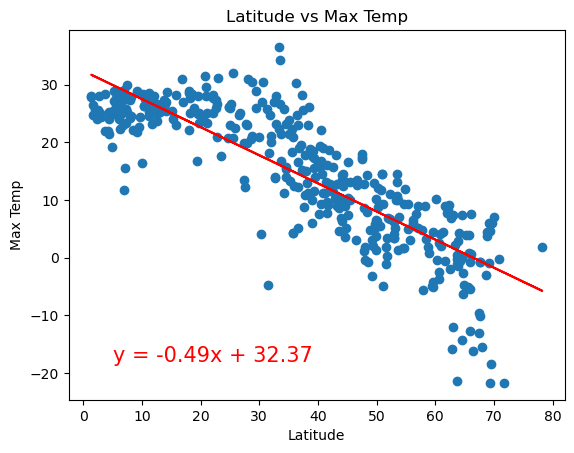

In [52]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
 
# Plot the regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Removed color="red"
plt.annotate(line_eq, (5, -18), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')
 
# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")
 
plt.show()
 

The r^2-value is: 0.6633760192899285


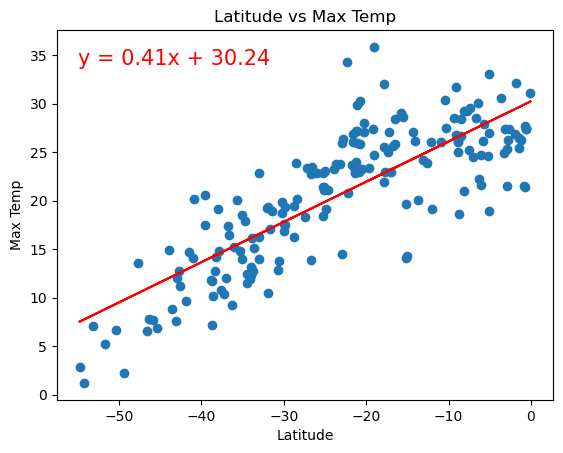

In [56]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Red regression line
plt.annotate(line_eq, (-55, 34), fontsize=15, color="red")  # Adjusted to match your example placement
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

plt.show()


**Discussion about the linear relationship:** In the northern hemisphere, as the latitude increases the Max Temperatures decrease, While in the southern Hemisphere the increasing latitude leads to an increase in Max Temperatures. Therefore the northern hemisphere has an inverse correlation between temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.00940423610030007


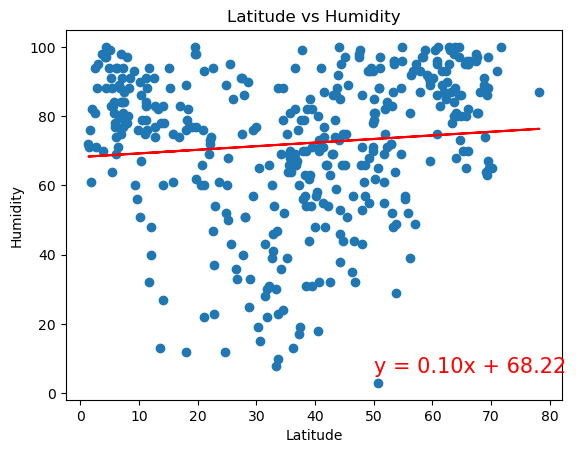

In [61]:
# Linear regression on Northern Hemisphere for Humidity vs Latitude
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Red regression line
plt.annotate(line_eq, (50, 6), fontsize=15, color="red")  # Adjusted position to match the example
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

plt.show()


The r^2-value is: 0.001342770301109825


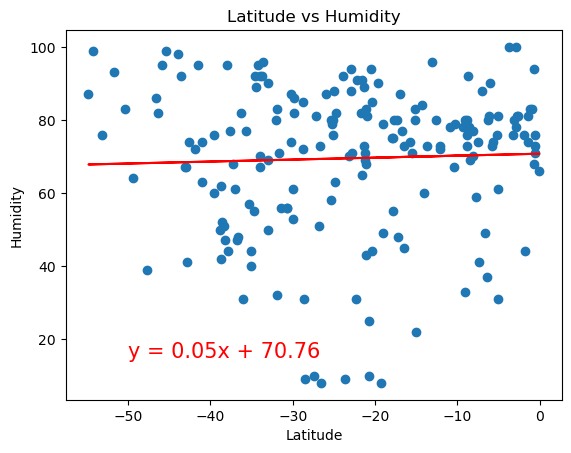

In [64]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Red regression line
plt.annotate(line_eq, (-50, 15), fontsize=15, color="red")  # Adjusted position to match the example
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

plt.show()


**Discussion about the linear relationship:** There is no linear correlation between the Latitude and Humidity in these scatterplots. Therefore Latitude has little to no influence on humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.002641093902023307


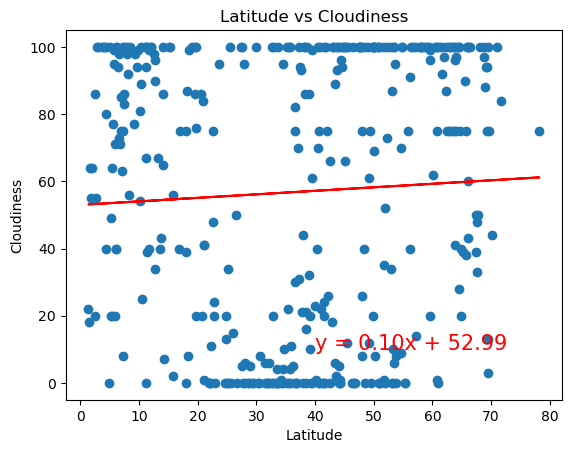

In [67]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Red regression line
plt.annotate(line_eq, (40, 10), fontsize=15, color="red")  # Adjusted position to match the example
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

plt.show()


The r^2-value is: 8.344942571711062e-07


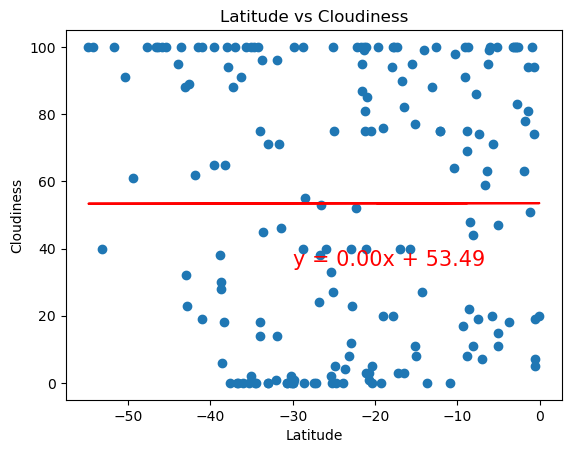

In [71]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Red regression line
plt.annotate(line_eq, (-30, 35), fontsize=15, color="red")  # Adjusted position to match the example
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

plt.show()


**Discussion about the linear relationship:** There is no correlation in either of these scatterplots. Therefore the Latitude has little to no influence on cloudiness values.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.008707357505101647


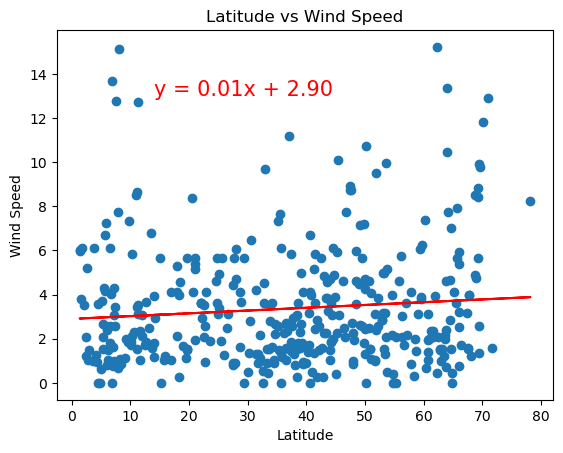

In [79]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Red regression line
plt.annotate(line_eq, (14, 13), fontsize=15, color="red")  # Adjusted position to match the example
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

plt.show()



The r^2-value is: 0.05703679709627679


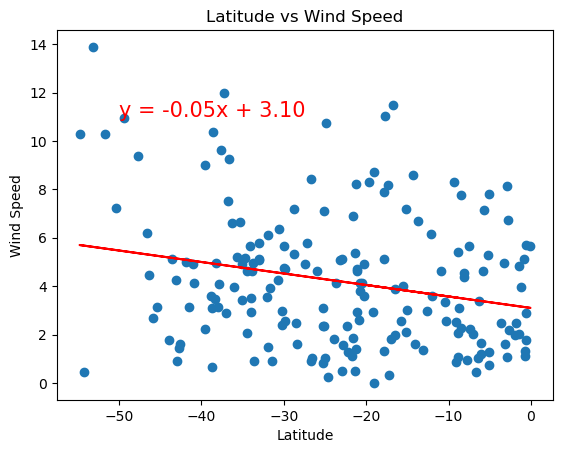

In [86]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere for Wind Speed vs Latitude
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot the regression
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")  # Red regression line
plt.annotate(line_eq, (-50, 11), fontsize=15, color="red")  # Adjusted position to match the example
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')

# Print the r-squared value
print(f"The r^2-value is: {rvalue**2}")

plt.show()


**Discussion about the linear relationship:** For both of these scatterplots the correlation between Latitude and Wind speed is weak. For the northern hemisphere there is a slight increase in wind speed as you increase in latitude. In the southern hemisphere as you increase in latitude there is less wind speed with a slightly stronger correlation.